Import packages and create function:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit #imports timeit module
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut,cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report,f1_score,accuracy_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import random
sns.set()


#standardize dataset
def standardize(x): 
    
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df1 = pd.DataFrame(x_scaled)
    return(df1)

#get row of accuracy
def ML_summary(Vars, model = None):
    
    #define X and y variables
    X = df.loc[:, Vars] 
    y = df.loc[:, "positive_negative"] 

    #standardize data
    X = standardize(X)

    #set the model
    if model == None:
        raise Exception("Needs Model")

    #set the CV
    kf = LeaveOneOut()
    
    #start timer for getting elapsed time
    from time import time
    import timeit #imports timeit module
    start_time = timeit.default_timer() #defines start time so computational time can be calculated

    #define lists
    acc_score = [];
    Truth = [];
    Output = [];

    #loop though each fold (so 40 times in our case)
    for train_index , test_index in kf.split(df):
        
        #split the data
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25, shuffle=True)

        #print(X_train); print(X_test); print(y_train); print(y_test)
        
        #fit the model
        model.fit(X_train,y_train)
        
        #preduct values
        pred_values = model.predict(X_test)

        #append the accuracy score
        acc = accuracy_score(pred_values, y_test)
        acc_score.append(acc)

        #add to the truth and output
        Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
        Output.extend(pred_values); ## it is a list  
        

 
    #determine the time elapesed
    elapsed = timeit.default_timer() - start_time #gives total computation time

    #return the dataframe
    #test = pd.DataFrame(data={"Predicted:": Output, "Real": Truth})
    
    #set output to a dataframe
    dfOutput = pd.DataFrame(data={"Model": str(model),
                                  "X Variable(s)": [str(Vars),],
                                  "Avg Accuracy": [np.mean(acc_score),],
                                  "SD of Accuracy": [np.std(acc_score),],
                                  "Sensitivity": [recall_score(Truth,Output,pos_label="negative"),],
                                  "Precision": [precision_score(Truth,Output,pos_label="negative"),],
                                  "F1-Score": [f1_score(Truth,Output,pos_label="negative"),],
                                  "Runtime": [elapsed,],
                                  "Confusion_Matrix": str(confusion_matrix(Truth,Output))}) #,"Real Specificity": [1,]
    #return output
    #test = pd.DataFrame(data={"Predicted:": Output, "Real": Truth})
    
    return dfOutput


def ML_compare_variables(modelList,variableList):
    
    outputList = []
    
    for j in modelList:
        
        outputList1 = []
        
        for i in variableList :
            outputList1.append(ML_summary(i,j))
            
        outputList1 = pd.concat(outputList1, ignore_index = True)
        
        outputList.append(outputList1)
    
    outputList = pd.concat(outputList, ignore_index = True)
    
    
    return outputList.sort_values(by = "F1-Score",ascending=False)




def ML_compare_variables_barGraph(modelList,variableList):
    
    models = []
    outputList = []
    
    for j in modelList:
        
        outputList1 = []
        
        for i in variableList :
            outputList1.append(ML_summary(i,j))
            
        outputList1 = pd.concat(outputList1, ignore_index = True)
        
        outputList.append(outputList1)
    
    
    
    outputList = pd.concat(outputList, ignore_index = True)

    plt.rcParams["figure.figsize"] = [15.00, 7.0]
    plt.rcParams["figure.autolayout"] = True
    labels = ['Logistic', 'LDA', 'KNN', 'SVC', 'Decision Tree', 'Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boost']
    avgAccuracy = outputList["Avg Accuracy"]  #outputList["avg..."]
    sensitivity = outputList["Sensitivity"]
    precision = outputList["Precision"]
    f1score = outputList["F1-Score"]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 3*width/2, avgAccuracy, width, label='Avg Accuracy',color = ("darkred"))
    rects2 = ax.bar(x - width/2, sensitivity, width, label='Sensitivity',color = ("crimson"))
    rects3 = ax.bar(x + width/2, precision, width, label='Precision',color = ("darkorange"))
    rects4 = ax.bar(x + 3*width/2, f1score, width, label ='F1-Score',color = ("gold"))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    cov = ""
    for i in variableList:
        for j in i:
            cov += j + ", "
    cov = cov[0:len(cov)-2]
    ax.set_ylabel('Values')
    ax.set_xlabel('Models')
    ax.set_ylim([0.4,1.05])
    ax.set_title("Comparing Different Models using " + cov)
    ax.set_xticks(x)
    ax.yaxis.grid(color = "black",linestyle='-', linewidth=1,alpha = .15)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    
    plt.show()
    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit #imports timeit module
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut,cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report,f1_score,accuracy_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import random
sns.set()


#standardize dataset
def standardize(x): 
    
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df1 = pd.DataFrame(x_scaled)
    return(df1)

#get row of accuracy
def ML_summary(Vars, model = None):
    
    #define X and y variables
    X = df.loc[:, Vars] 
    y = df.loc[:, "positive_negative"] 

    #standardize data
    X = standardize(X)

    #set the model
    if model == None:
        raise Exception("Needs Model")

    #set the CV
    kf = LeaveOneOut()
    
    #start timer for getting elapsed time
    from time import time
    import timeit #imports timeit module
    start_time = timeit.default_timer() #defines start time so computational time can be calculated

    #define lists
    acc_score = [];
    Truth = [];
    Output = [];

    #loop though each fold (so 40 times in our case)
    for train_index , test_index in kf.split(df):
        
        #split the data
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25, shuffle=True)

        #print(X_train); print(X_test); print(y_train); print(y_test)
        
        #fit the model
        model.fit(X_train,y_train)
        
        #preduct values
        pred_values = model.predict(X_test)

        #append the accuracy score
        acc = accuracy_score(pred_values, y_test)
        acc_score.append(acc)

        #add to the truth and output
        Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
        Output.extend(pred_values); ## it is a list  
        

 
    #determine the time elapesed
    elapsed = timeit.default_timer() - start_time #gives total computation time

    #return the dataframe
    #test = pd.DataFrame(data={"Predicted:": Output, "Real": Truth})
    
    #set output to a dataframe
    dfOutput = pd.DataFrame(data={"Model": str(model),
                                  "X Variable(s)": [str(Vars),],
                                  "Avg Accuracy": [np.mean(acc_score),],
                                  "SD of Accuracy": [np.std(acc_score),],
                                  "Sensitivity": [recall_score(Truth,Output,pos_label="negative"),],
                                  "Precision": [precision_score(Truth,Output,pos_label="negative"),],
                                  "F1-Score": [f1_score(Truth,Output,pos_label="negative"),],
                                  "Runtime": [elapsed,],
                                  "Confusion_Matrix": str(confusion_matrix(Truth,Output))}) #,"Real Specificity": [1,]
    #return output
    #test = pd.DataFrame(data={"Predicted:": Output, "Real": Truth})
    
    return dfOutput


def ML_compare_variables(modelList,variableList):
    
    outputList = []
    
    for j in modelList:
        
        outputList1 = []
        
        for i in variableList :
            outputList1.append(ML_summary(i,j))
            
        outputList1 = pd.concat(outputList1, ignore_index = True)
        
        outputList.append(outputList1)
    
    outputList = pd.concat(outputList, ignore_index = True)
    
    
    return outputList.sort_values(by = "F1-Score",ascending=False)




def ML_compare_variables_barGraph(modelList,variableList):
    
    models = []
    outputList = []
    
    for j in modelList:
        
        outputList1 = []
        
        for i in variableList :
            outputList1.append(ML_summary(i,j))
            
        outputList1 = pd.concat(outputList1, ignore_index = True)
        
        outputList.append(outputList1)
    
    
    
    outputList = pd.concat(outputList, ignore_index = True)

    plt.rcParams["figure.figsize"] = [15.00, 7.0]
    plt.rcParams["figure.autolayout"] = True
    labels = ['Logistic', 'LDA', 'KNN', 'SVC', 'Decision Tree', 'Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boost']
    avgAccuracy = outputList["Avg Accuracy"]  #outputList["avg..."]
    sensitivity = outputList["Sensitivity"]
    precision = outputList["Precision"]
    f1score = outputList["F1-Score"]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 3*width/2, avgAccuracy, width, label='Avg Accuracy',color = ("darkred"))
    rects2 = ax.bar(x - width/2, sensitivity, width, label='Sensitivity',color = ("crimson"))
    rects3 = ax.bar(x + width/2, precision, width, label='Precision',color = ("darkorange"))
    rects4 = ax.bar(x + 3*width/2, f1score, width, label ='F1-Score',color = ("gold"))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    cov = ""
    for i in variableList:
        for j in i:
            cov += j + ", "
    cov = cov[0:len(cov)-2]
    ax.set_ylabel('Values')
    ax.set_xlabel('Models')
    ax.set_ylim([0.4,1.05])
    ax.set_title("Comparing Different Models using " + cov)
    ax.set_xticks(x)
    ax.yaxis.grid(color = "black",linestyle='-', linewidth=1,alpha = .15)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    
    plt.show()

### Group 1:

In [3]:
df = pd.read_csv('data/Group1CataractData.csv', na_values='?')
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["ogAA_letterCode"] = le.fit_transform(df.ogAA_letter)
df["mutAA_letterCode"] = le.fit_transform(df.mutAA_letter)
"""df["ogAA_charCode"] = le.fit_transform(df.ogAA_char)
df["mutAA_charCode"] = le.fit_transform(df.mutAA_char)"""

df1 = df
df.head(5)

,index_name,ogAA_letter,positionAA_num,mutAA_letter,OG_polarity,mut_polarity,OG_hydrophobicity,mut_hydrophobicity,OG AA Charge,M AA Charge,shape,iso_point,deldel_G1,deldel_G2,deldel_G3,positive_negative,ogAA_letterCode,mutAA_letterCode
0,R11C,R,11,C,l,l,-14,63,+,NaN,A,6.50,-0.66,-0.751450,0.009686,positive,10,1
1,R11H,R,11,H,l,l,-14,-31,+,+,A,6.55,-0.96,-1.160834,-0.253809,positive,10,5
2,R12C,R,12,C,l,l,-14,63,+,NaN,U,6.50,-0.69,-0.918708,-0.062331,positive,10,1
3,R69C,R,69,C,l,l,-14,63,+,NaN,U,6.50,-1.05,-0.567436,-0.396340,positive,10,1
4,R107L,R,107,L,l,n,-14,100,+,NaN,B,6.50,-0.41,-0.347108,-0.090266,positive,10,7


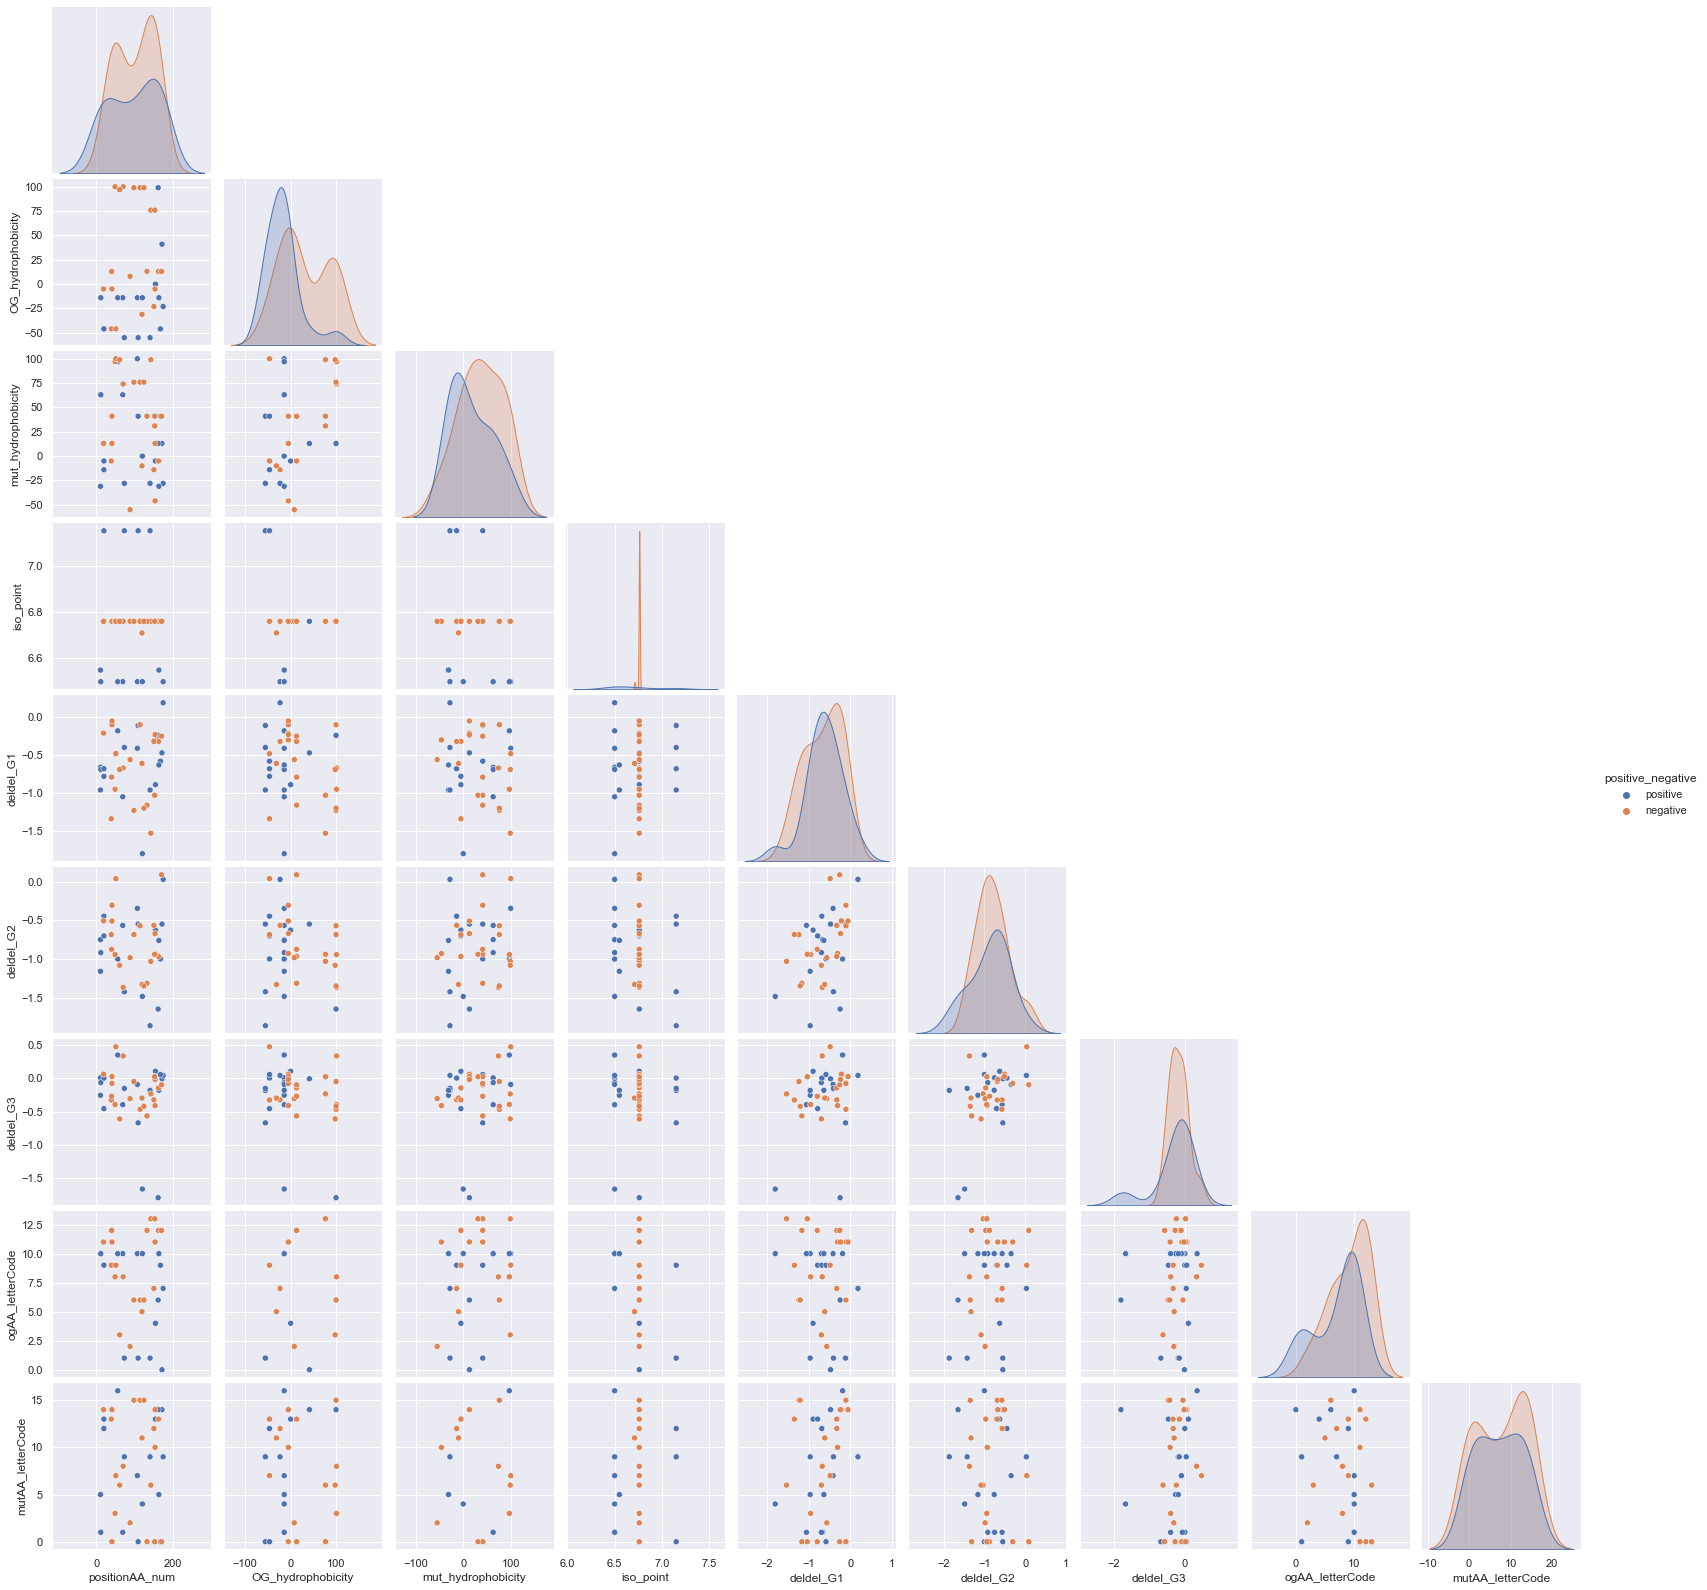

In [4]:
sns.pairplot(data=df, hue='positive_negative', corner=True)

In [5]:
#Compare all variables
ML_compare_variables([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                      neighbors.KNeighborsClassifier(n_neighbors = 3),
                      LinearDiscriminantAnalysis(),
                      DecisionTreeClassifier(max_depth=3),
                      BaggingClassifier(),
                      RandomForestClassifier(max_depth = 3),
                      AdaBoostClassifier(n_estimators= 100, learning_rate = 0.1, algorithm="SAMME.R"),
                      GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4),
                      SVC(C=1, kernel='linear')],
                           [["iso_point","mut_hydrophobicity"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
3,DecisionTreeClassifier(max_depth=3),"['iso_point', 'mut_hydrophobicity']",0.871397,0.091958,0.984848,0.828025,0.899654,0.129568,[[260 4]\n [ 54 133]]
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['iso_point', 'mut_hydrophobicity']",0.827051,0.097963,0.934363,0.798680,0.861210,4.761618,[[242 17]\n [ 61 131]]
5,RandomForestClassifier(max_depth=3),"['iso_point', 'mut_hydrophobicity']",0.811530,0.103146,0.952756,0.768254,0.850615,4.794257,[[242 12]\n [ 73 124]]
4,BaggingClassifier(),"['iso_point', 'mut_hydrophobicity']",0.796009,0.114958,0.841699,0.810409,0.825758,0.711562,[[218 41]\n [ 51 141]]
1,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'mut_hydrophobicity']",0.764967,0.117035,0.824427,0.782609,0.802974,0.170281,[[216 46]\n [ 60 129]]
7,GradientBoostingClassifier(max_depth=4),"['iso_point', 'mut_hydrophobicity']",0.753880,0.104801,0.813953,0.769231,0.790960,1.790141,[[210 48]\n [ 63 130]]
8,"SVC(C=1, kernel='linear')","['iso_point', 'mut_hydrophobicity']",0.498891,0.127181,0.860082,0.521197,0.649068,0.130600,[[209 34]\n [192 16]]
2,LinearDiscriminantAnalysis(),"['iso_point', 'mut_hydrophobicity']",0.558758,0.129441,0.683206,0.606780,0.642729,0.147755,[[179 83]\n [116 73]]
0,"LogisticRegression(class_weight='balanced', so...","['iso_point', 'mut_hydrophobicity']",0.547672,0.119611,0.649789,0.560000,0.601562,0.138443,[[154 83]\n [121 93]]


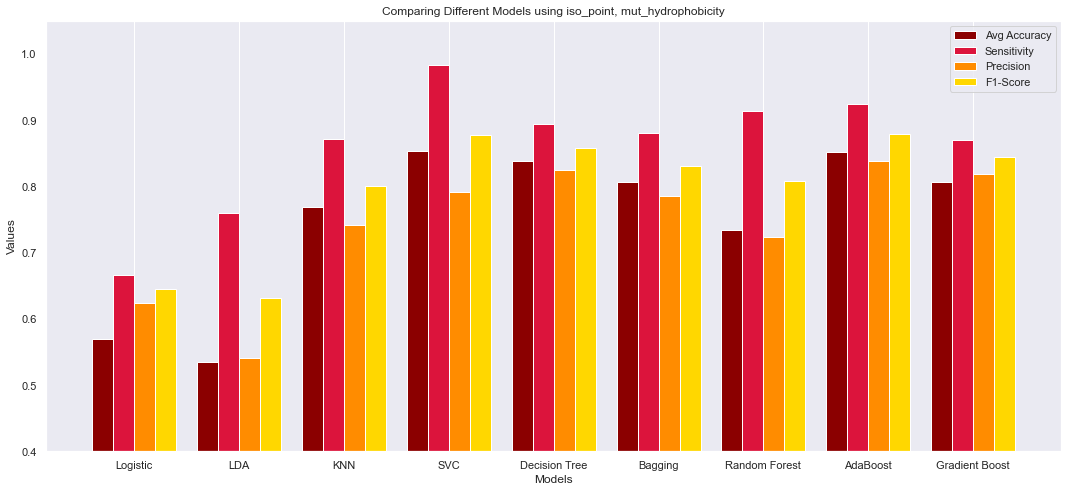

In [6]:
ML_compare_variables_barGraph([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                               LinearDiscriminantAnalysis(),
                               neighbors.KNeighborsClassifier(n_neighbors = 3),
                               SVC(C=6, kernel='rbf'),
                              DecisionTreeClassifier(),
                              BaggingClassifier(),
                              RandomForestClassifier(max_depth = 1),
                              AdaBoostClassifier(n_estimators=50, learning_rate = 0.1, algorithm="SAMME.R"),
                              GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, max_depth = 4)],
                     [["iso_point","mut_hydrophobicity"]])

### Group 2:

In [7]:
df = pd.read_csv('data/Group2CataractData.csv', na_values='?')
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["ogAA_letterCode"] = le.fit_transform(df.ogAA_letter)
df["mutAA_letterCode"] = le.fit_transform(df.mutAA_letter)
df["ogAA_charCode"] = le.fit_transform(df.ogAA_char)
df["mutAA_charCode"] = le.fit_transform(df.mutAA_char)

df2 = df
df.head(5)

,index_name,ogAA_letter,positionAA_num,mutAA_letter,iso_point,ogAA_char,mutAA_char,deldel_G1,solv_area,deldel_G2,deldel_G3,evo_age,pdel,cons_time,positive_negative,ogAA_letterCode,mutAA_letterCode,ogAA_charCode,mutAA_charCode
0,R11H,R,11,H,6.55,+,"H,+",-0.96,NaN,-1.1608,NaN,750,0.74,6,positive,11,5,0,5
1,R107L,R,107,L,6.50,+,n,-0.21,NaN,-0.3471,NaN,750,0.74,8,positive,11,7,0,8
2,A171T,A,171,T,6.76,n,l,-0.52,NaN,-0.5500,NaN,324,0.50,1,positive,0,14,5,7
3,P20S,P,20,S,6.76,"P,n",I,-1.11,NaN,-0.7036,NaN,750,0.74,8,positive,9,13,3,6
4,D109H,D,109,H,7.18,-,"H, +",-0.36,NaN,-0.6619,NaN,750,0.74,8,positive,1,5,1,4


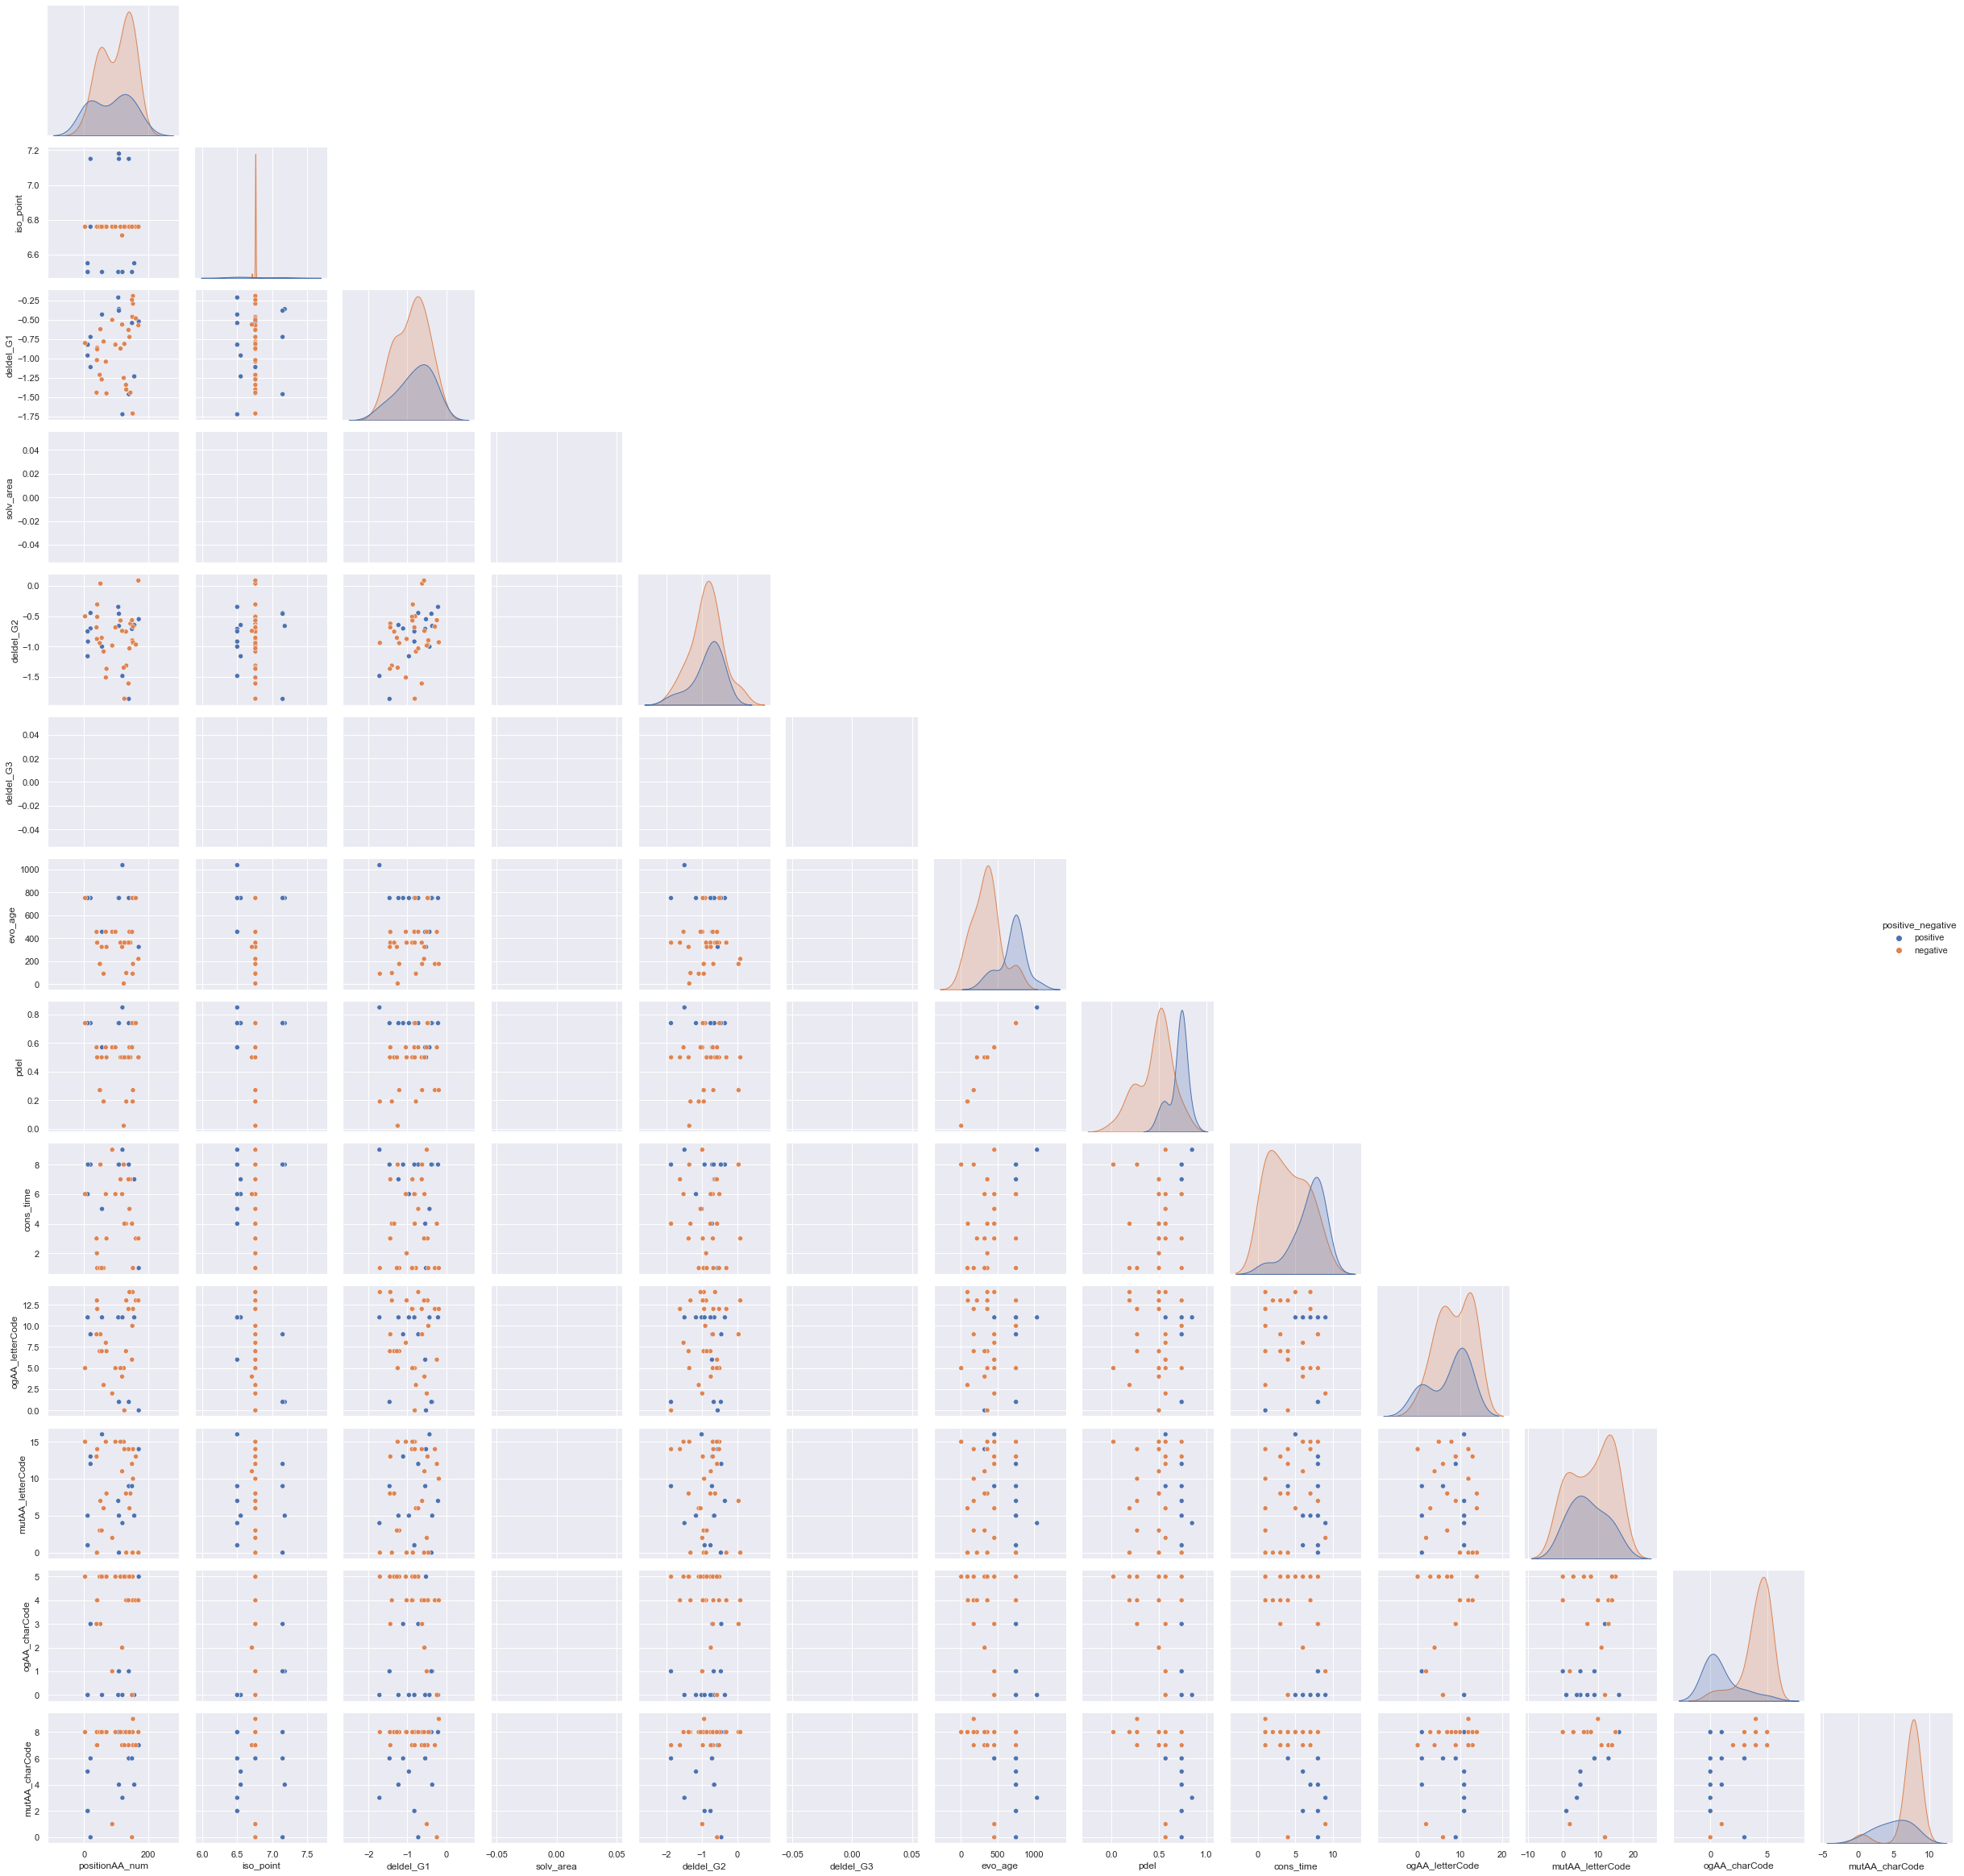

In [8]:
sns.pairplot(data=df, hue='positive_negative', corner=True)

In [9]:
#Compare all variables
ML_compare_variables([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                      neighbors.KNeighborsClassifier(n_neighbors = 3),
                      LinearDiscriminantAnalysis(),
                      DecisionTreeClassifier(max_depth=3),
                      BaggingClassifier(),
                      RandomForestClassifier(max_depth = 3),
                      AdaBoostClassifier(n_estimators= 100, learning_rate = 0.1, algorithm="SAMME.R"),
                      GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4),
                      SVC(C=1, kernel='linear')],
                           [["iso_point","pdel"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
3,DecisionTreeClassifier(max_depth=3),"['iso_point', 'pdel']",0.945032,0.076286,1.000000,0.927171,0.962209,0.130944,[[331 0]\n [ 26 116]]
1,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'pdel']",0.936575,0.072130,1.000000,0.914286,0.955224,0.171011,[[320 0]\n [ 30 123]]
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['iso_point', 'pdel']",0.936575,0.079724,0.974684,0.933333,0.953560,5.040552,[[308 8]\n [ 22 135]]
7,GradientBoostingClassifier(max_depth=4),"['iso_point', 'pdel']",0.936575,0.074747,0.990196,0.918182,0.952830,1.827376,[[303 3]\n [ 27 140]]
4,BaggingClassifier(),"['iso_point', 'pdel']",0.921776,0.091081,0.976261,0.918994,0.946763,0.725535,[[329 8]\n [ 29 107]]
5,RandomForestClassifier(max_depth=3),"['iso_point', 'pdel']",0.919662,0.096467,0.959459,0.916129,0.937294,5.041714,[[284 12]\n [ 26 151]]
2,LinearDiscriminantAnalysis(),"['iso_point', 'pdel']",0.816068,0.120043,0.902141,0.842857,0.871492,0.148264,[[295 32]\n [ 55 91]]
8,"SVC(C=1, kernel='linear')","['iso_point', 'pdel']",0.691332,0.112866,0.993884,0.692964,0.816583,0.136009,[[325 2]\n [144 2]]
0,"LogisticRegression(class_weight='balanced', so...","['iso_point', 'pdel']",0.727273,0.125539,0.718750,0.855019,0.780985,0.153703,[[230 90]\n [ 39 114]]


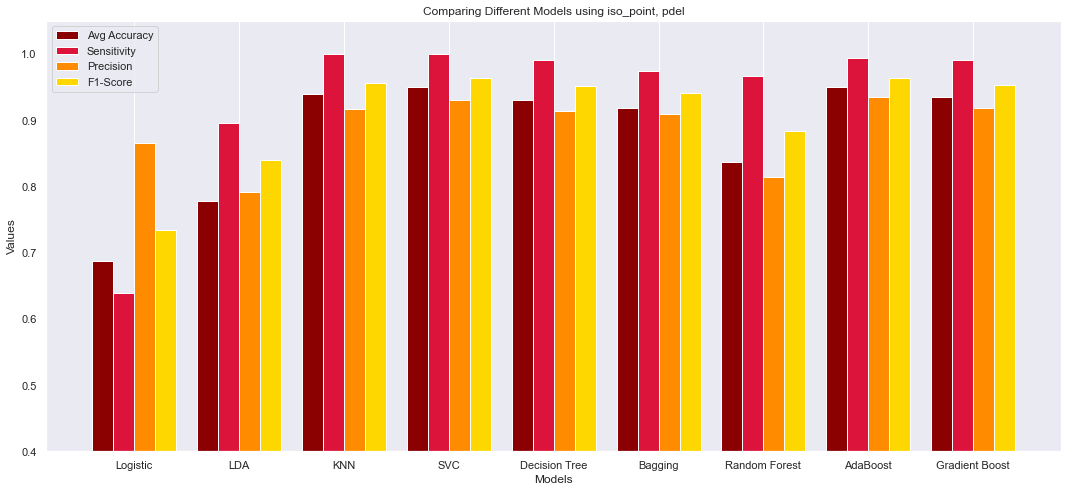

In [10]:
ML_compare_variables_barGraph([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                               LinearDiscriminantAnalysis(),
                               neighbors.KNeighborsClassifier(n_neighbors = 3),
                               SVC(C=6, kernel='rbf'),
                              DecisionTreeClassifier(),
                              BaggingClassifier(),
                              RandomForestClassifier(max_depth = 1),
                              AdaBoostClassifier(n_estimators=50, learning_rate = 0.1, algorithm="SAMME.R"),
                              GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, max_depth = 4)],
                     [["iso_point","pdel"]])

### Group 4:

In [11]:
df = pd.read_csv('data/Group4CataractData.csv', na_values='?')
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["ogAA_letterCode"] = le.fit_transform(df.ogAA_letter)
df["mutAA_letterCode"] = le.fit_transform(df.mutAA_letter)
df["ogAA_charCode"] = le.fit_transform(df.ogAA_char)
df["mutAA_charCode"] = le.fit_transform(df.mutAA_char)

df4 = df
df.head(5)

,positive_negative,index_name,ogAA_letter,positionAA_num,mutAA_letter,iso_point,ogAA_char,mutAA_char,deldel_G1,solv_area,...,evo_age,pdel,cons_time,att2_ogAA,att2_mutAA,INPS DDG,ogAA_letterCode,mutAA_letterCode,ogAA_charCode,mutAA_charCode
0,positive,I124V,I,124,V,6.76,n,n,NaN,NaN,...,6,0.02,4,s,b,0.044054,3,12,4,5
1,positive,T132A,T,132,A,6.76,l,n,NaN,NaN,...,97,0.19,4,b,s,-0.389473,10,0,3,5
2,positive,T40A,T,40,A,6.76,l,n,NaN,NaN,...,361,0.50,2,b,s,-0.112969,10,0,3,5
3,positive,F61I,F,61,I,6.76,n,n,NaN,NaN,...,91,0.19,1,r,s,-0.123474,2,5,4,5
4,positive,A57M,A,57,M,6.76,n,n,NaN,NaN,...,156,0.27,4,s,b,0.845076,0,7,4,5


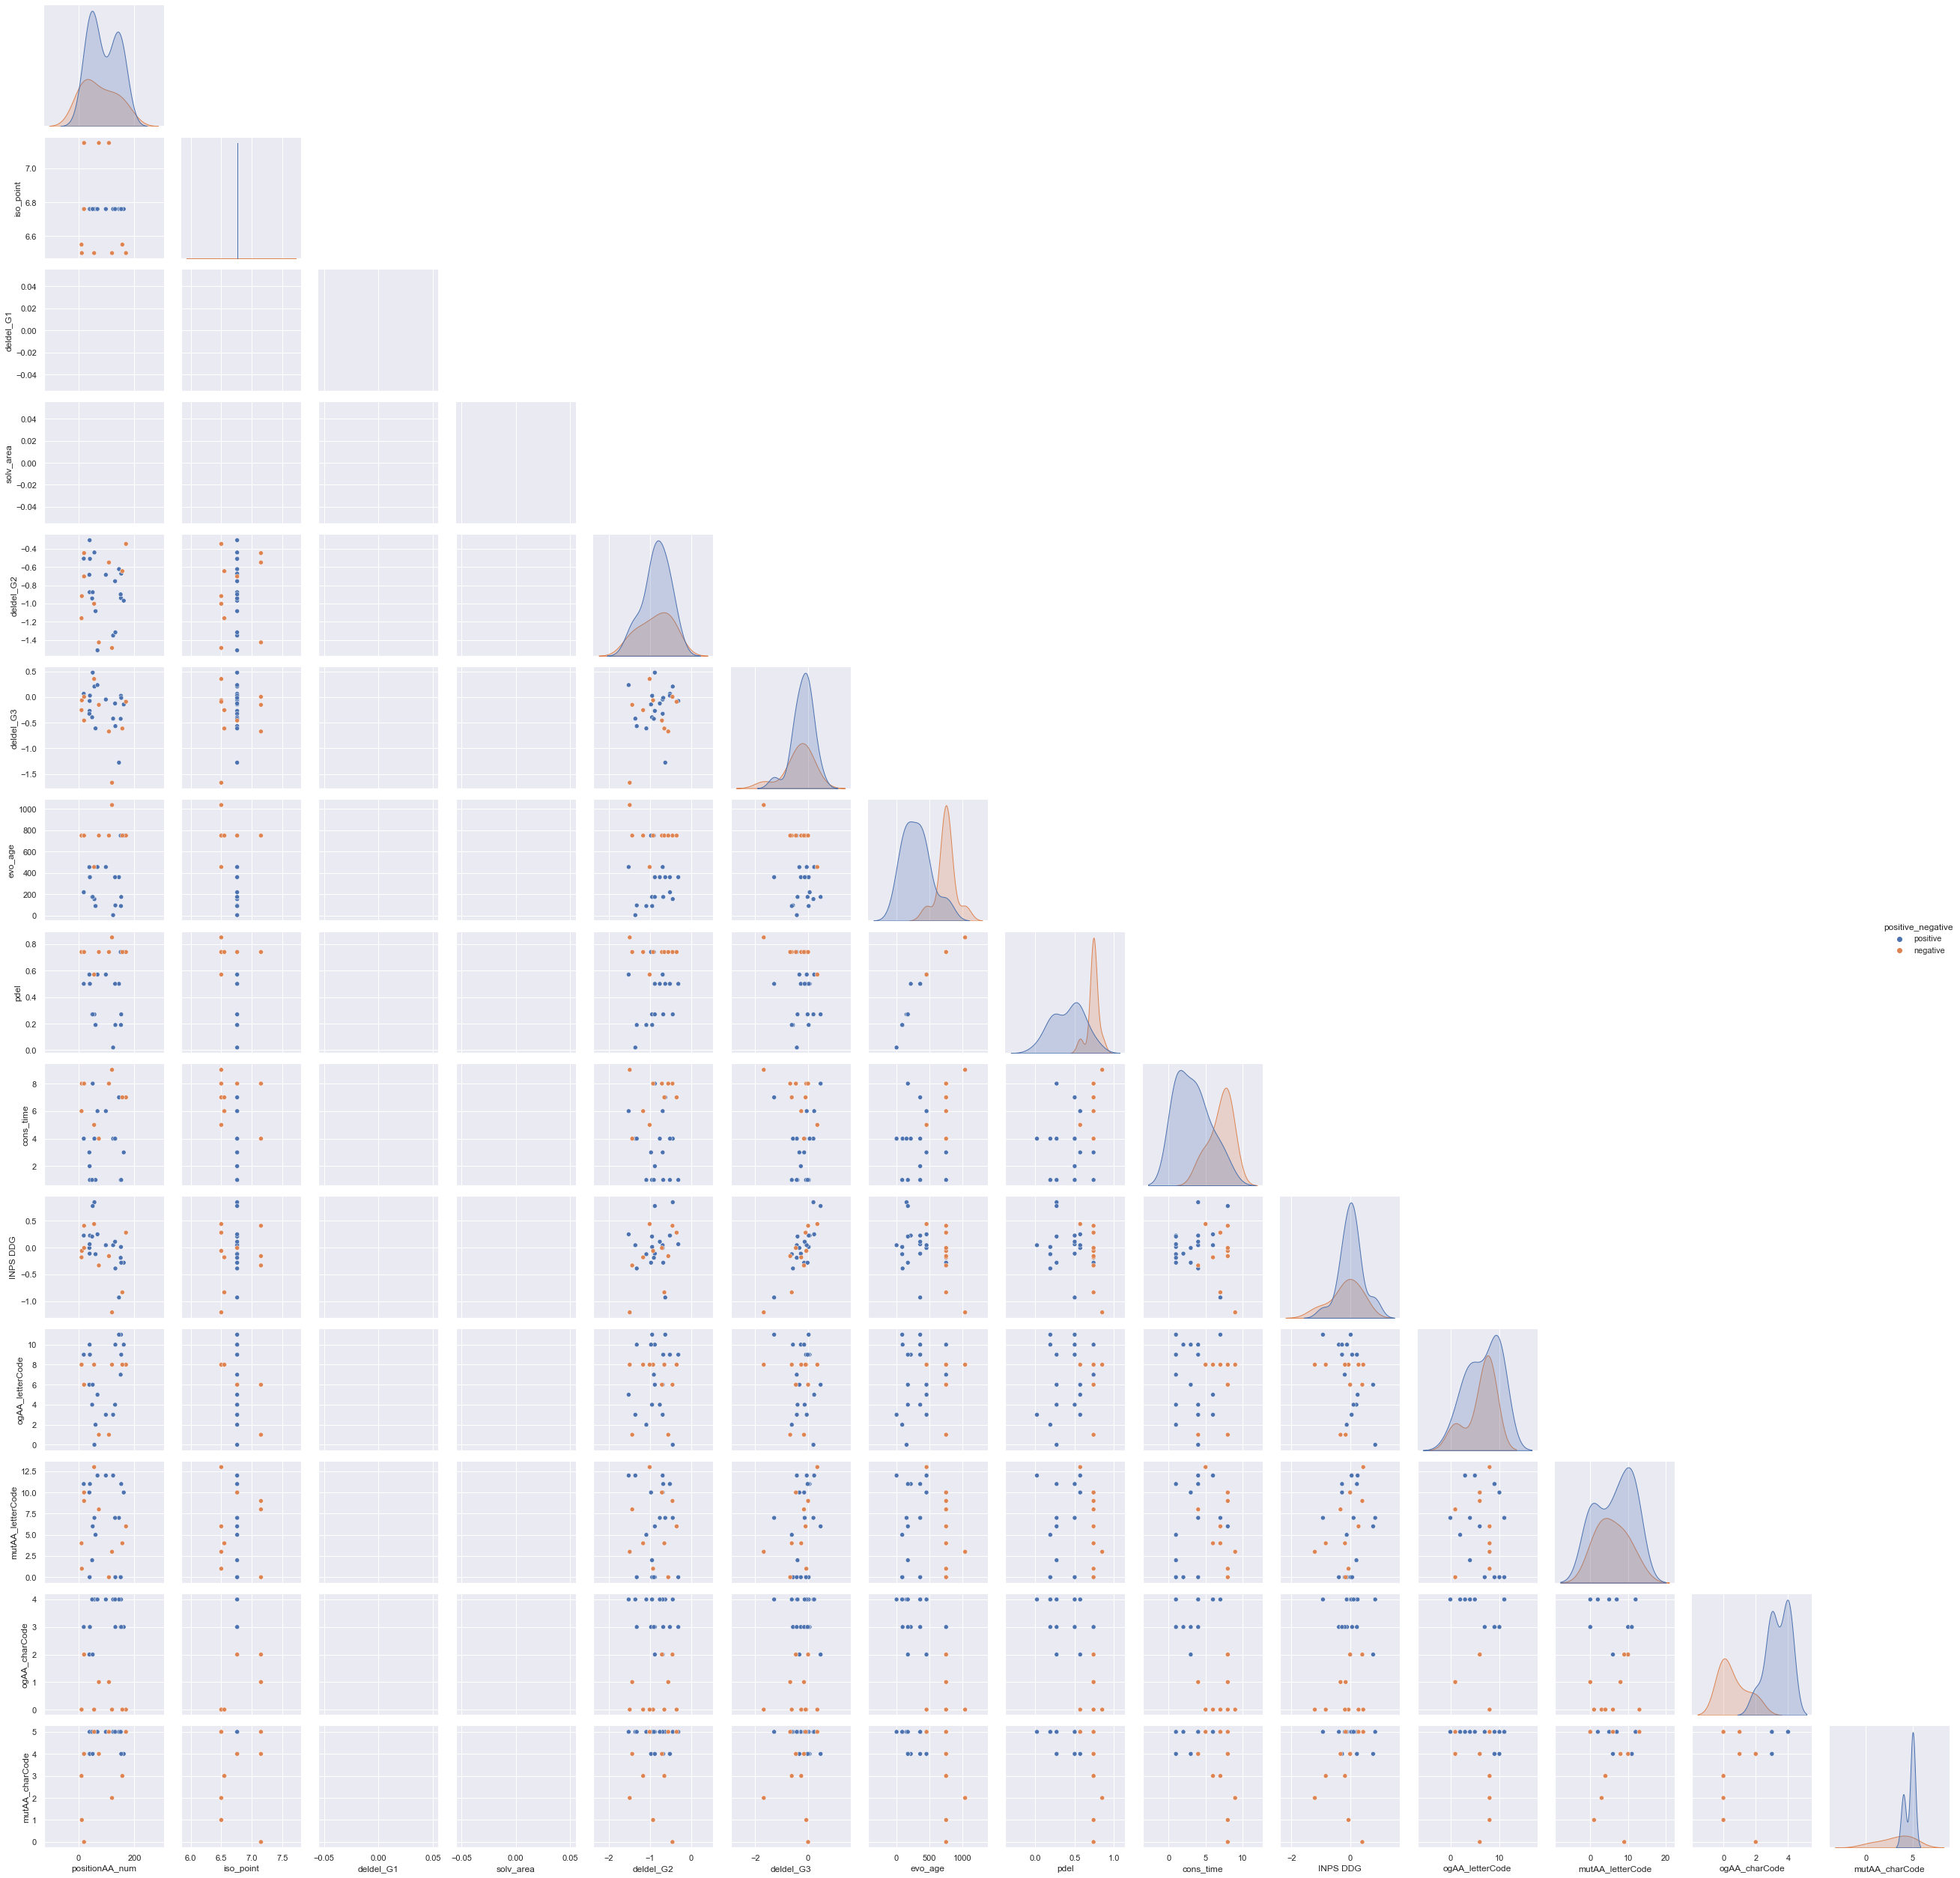

In [12]:
sns.pairplot(data=df, hue='positive_negative', corner=True)

In [13]:
#Compare all variables
ML_compare_variables([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                      neighbors.KNeighborsClassifier(n_neighbors = 3),
                      LinearDiscriminantAnalysis(),
                      DecisionTreeClassifier(max_depth=3),
                      BaggingClassifier(),
                      RandomForestClassifier(max_depth = 3),
                      AdaBoostClassifier(n_estimators= 100, learning_rate = 0.1, algorithm="SAMME.R"),
                      GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4),
                      SVC(C=1)],
                           [["iso_point","pdel"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
1,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'pdel']",0.952586,0.089381,0.860759,1.000000,0.925170,0.114425,[[ 68 11]\n [ 0 153]]
8,SVC(C=1),"['iso_point', 'pdel']",0.926724,0.069769,0.836957,0.974684,0.900585,0.090963,[[ 77 15]\n [ 2 138]]
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['iso_point', 'pdel']",0.896552,0.093247,0.872093,0.852273,0.862069,3.384496,[[ 75 11]\n [ 13 133]]
7,GradientBoostingClassifier(max_depth=4),"['iso_point', 'pdel']",0.913793,0.099044,0.780822,0.934426,0.850746,1.037091,[[ 57 16]\n [ 4 155]]
3,DecisionTreeClassifier(max_depth=3),"['iso_point', 'pdel']",0.879310,0.089796,0.806818,0.865854,0.835294,0.088822,[[ 71 17]\n [ 11 133]]
4,BaggingClassifier(),"['iso_point', 'pdel']",0.862069,0.094828,0.747253,0.883117,0.809524,0.487009,[[ 68 23]\n [ 9 132]]
2,LinearDiscriminantAnalysis(),"['iso_point', 'pdel']",0.866379,0.118044,0.853333,0.761905,0.805031,0.101388,[[ 64 11]\n [ 20 137]]
5,RandomForestClassifier(max_depth=3),"['iso_point', 'pdel']",0.853448,0.104164,0.780488,0.800000,0.790123,3.397765,[[ 64 18]\n [ 16 134]]
0,"LogisticRegression(class_weight='balanced', so...","['iso_point', 'pdel']",0.633621,0.146552,0.819277,0.492754,0.615385,0.096940,[[68 15]\n [70 79]]


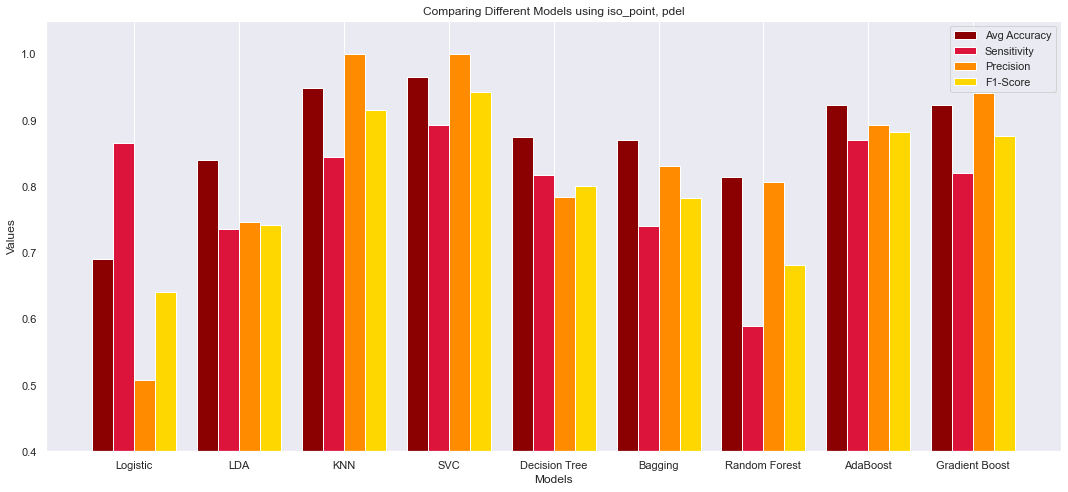

In [14]:
ML_compare_variables_barGraph([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                               LinearDiscriminantAnalysis(),
                               neighbors.KNeighborsClassifier(n_neighbors = 3),
                               SVC(C=6, kernel='rbf'),
                              DecisionTreeClassifier(),
                              BaggingClassifier(),
                              RandomForestClassifier(max_depth = 1),
                              AdaBoostClassifier(n_estimators=100, learning_rate = 0.1, algorithm="SAMME.R"),
                              GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4)],
                     [["iso_point","pdel"]])

### All Biotech Groups:

In [15]:
df = pd.concat([df2,df4],ignore_index = False)
df.drop_duplicates(subset=['index_name'])
df.head(5)

,index_name,ogAA_letter,positionAA_num,mutAA_letter,iso_point,ogAA_char,mutAA_char,deldel_G1,solv_area,deldel_G2,...,pdel,cons_time,positive_negative,ogAA_letterCode,mutAA_letterCode,ogAA_charCode,mutAA_charCode,att2_ogAA,att2_mutAA,INPS DDG
0,R11H,R,11,H,6.55,+,"H,+",-0.96,NaN,-1.1608,...,0.74,6,positive,11,5,0,5,NaN,NaN,NaN
1,R107L,R,107,L,6.50,+,n,-0.21,NaN,-0.3471,...,0.74,8,positive,11,7,0,8,NaN,NaN,NaN
2,A171T,A,171,T,6.76,n,l,-0.52,NaN,-0.5500,...,0.50,1,positive,0,14,5,7,NaN,NaN,NaN
3,P20S,P,20,S,6.76,"P,n",I,-1.11,NaN,-0.7036,...,0.74,8,positive,9,13,3,6,NaN,NaN,NaN
4,D109H,D,109,H,7.18,-,"H, +",-0.36,NaN,-0.6619,...,0.74,8,positive,1,5,1,4,NaN,NaN,NaN


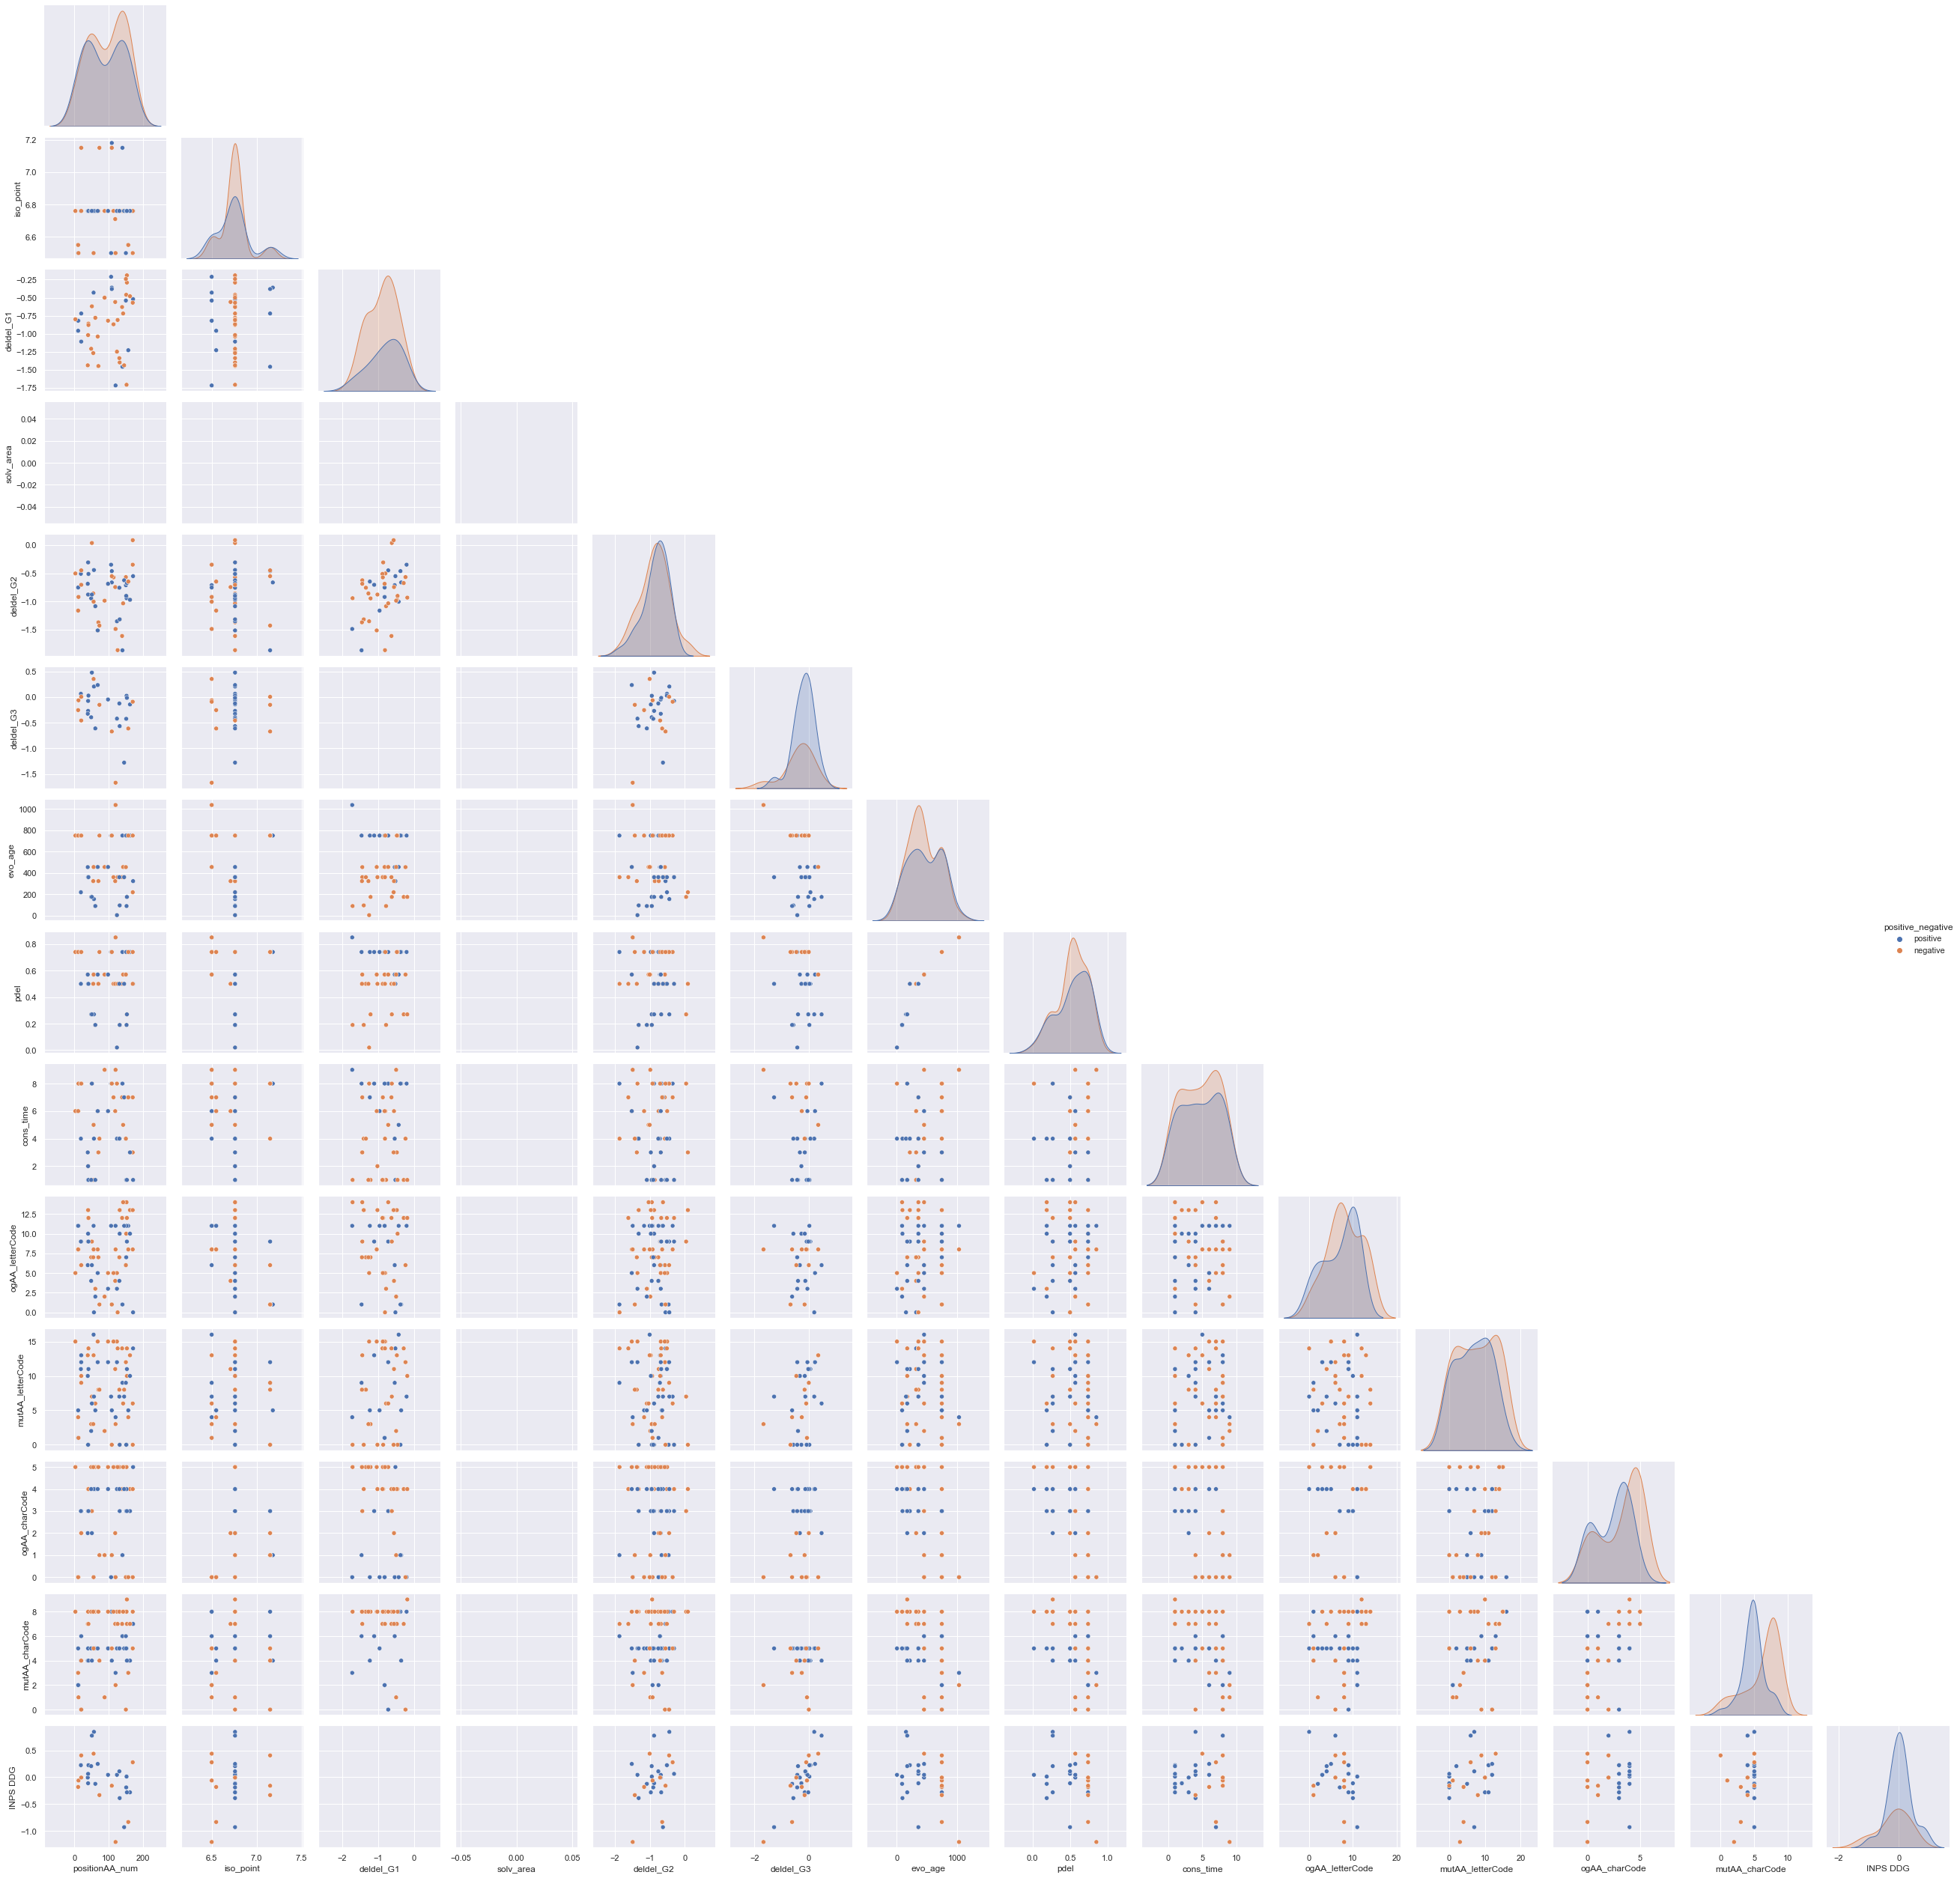

In [16]:
sns.pairplot(data=df, hue='positive_negative', corner=True)

In [17]:
#Compare all variables
ML_compare_variables([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                      neighbors.KNeighborsClassifier(n_neighbors = 3),
                      LinearDiscriminantAnalysis(),
                      DecisionTreeClassifier(max_depth=3),
                      BaggingClassifier(),
                      RandomForestClassifier(max_depth = 3),
                      AdaBoostClassifier(n_estimators= 100, learning_rate = 0.1, algorithm="SAMME.R"),
                      GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4),
                      SVC(C=1)],
                           [["iso_point","pdel"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
2,LinearDiscriminantAnalysis(),"['iso_point', 'pdel']",0.456790,0.094073,0.797337,0.487342,0.604938,0.253284,[[539 137]\n [567 53]]
8,SVC(C=1),"['iso_point', 'pdel']",0.466049,0.096916,0.660000,0.504367,0.571782,0.241508,[[462 238]\n [454 142]]
3,DecisionTreeClassifier(max_depth=3),"['iso_point', 'pdel']",0.415895,0.102687,0.642559,0.480249,0.549673,0.222066,[[462 257]\n [500 77]]
5,RandomForestClassifier(max_depth=3),"['iso_point', 'pdel']",0.423611,0.087075,0.632539,0.481838,0.546998,8.415973,[[451 262]\n [485 98]]
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['iso_point', 'pdel']",0.422840,0.088597,0.617729,0.485839,0.543902,8.454527,[[446 276]\n [472 102]]
7,GradientBoostingClassifier(max_depth=4),"['iso_point', 'pdel']",0.409722,0.095526,0.611650,0.476242,0.535519,3.311243,[[441 280]\n [485 90]]
4,BaggingClassifier(),"['iso_point', 'pdel']",0.388117,0.097329,0.537335,0.434834,0.480681,1.218930,[[367 316]\n [477 136]]
1,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'pdel']",0.402006,0.097329,0.446809,0.450000,0.448399,0.307037,[[315 390]\n [385 206]]
0,"LogisticRegression(class_weight='balanced', so...","['iso_point', 'pdel']",0.397377,0.091033,0.407514,0.431853,0.419331,0.240211,[[282 410]\n [371 233]]


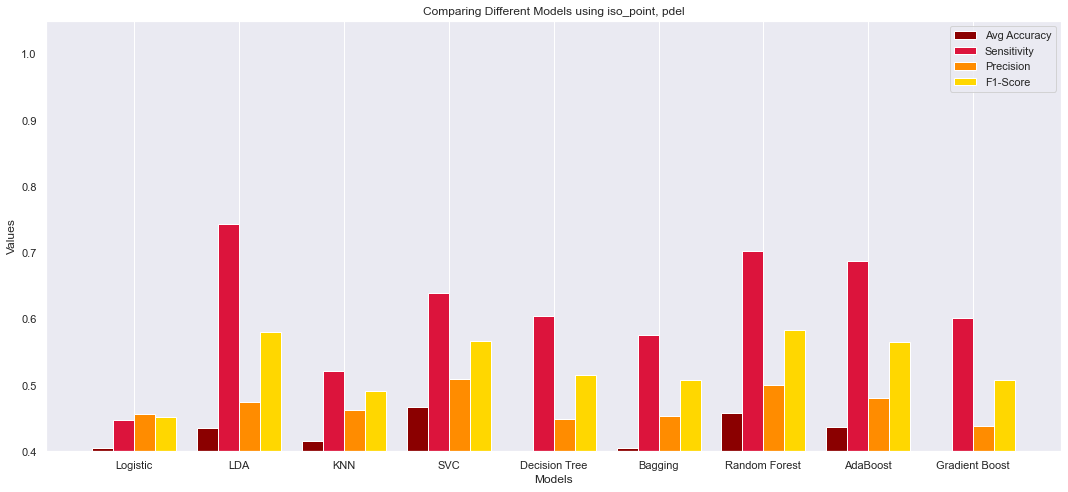

In [18]:
ML_compare_variables_barGraph([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                               LinearDiscriminantAnalysis(),
                               neighbors.KNeighborsClassifier(n_neighbors = 3),
                               SVC(C=6, kernel='rbf'),
                              DecisionTreeClassifier(),
                              BaggingClassifier(),
                              RandomForestClassifier(max_depth = 1),
                              AdaBoostClassifier(n_estimators=100, learning_rate = 0.1, algorithm="SAMME.R"),
                              GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4)],
                     [["iso_point","pdel"]])